# Getting started with `SacessOptimizer`

A short introduction to using the self-adaptive cooperative enhanced scatter search (saCeSS) implementation from `pyscat` for global optimization.

## Setting up the optimization problem

`pyscat` builds on top of `pypesto` and thus requires a `pypesto.Problem` instance to define the optimization problem. Here, we create a simple test problem using the Rosenbrock function.

In [1]:
import logging

import numpy as np
from pypesto import Problem
from pypesto.objective import Objective
from scipy.optimize import rosen, rosen_der

# Create an objective function based on the Rosenbrock function
objective = Objective(fun=rosen, grad=rosen_der)

# Define the optimization problem with bounds
problem = Problem(
    objective=objective,
    # SacessOptimizer requires finite bounds on all estimated parameters
    lb=0 * np.ones((1, 2)),
    ub=1 * np.ones((1, 2)),
)

Let's visualize the Rosenbrock function to get an idea of the optimization landscape:

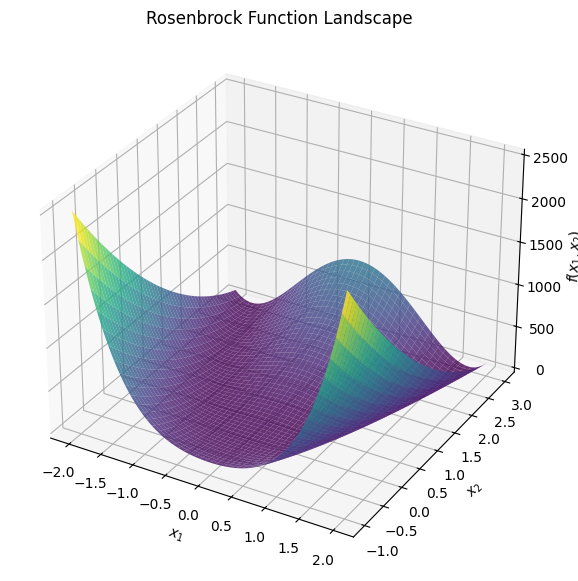

In [2]:
import matplotlib.pyplot as plt


def plot_rosenbrock():
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosen(np.array([X, Y]))
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$f(x_1, x_2)$")
    ax.set_title("Rosenbrock Function Landscape")
    plt.show()


plot_rosenbrock()

## Running the optimization

We can now set up and run the `SacessOptimizer`. saCeSS has a variety of hyperparameters that can be tuned to improve optimization performance. Here, we will use the default settings for simplicity.

Two settings are mandatory for `SacessOptimizer`: the number of workers, i.e., parallel processes, and the walltime for the optimization.

In [3]:
from pyscat import SacessOptimizer

# Initialize the SacessOptimizer
optimizer = SacessOptimizer(
    # The minimum number of workers is 2, but using more is recommended
    num_workers=8,
    # For this simple example, a couple of seconds is sufficient
    max_walltime_s=1,
    # Disable verbose output for cleaner output
    sacess_loglevel=logging.WARNING,
)

# Run the optimization
res = optimizer.minimize(problem=problem)

The optimization result is stored in a `pypesto.Result` object. We can inspect the best found parameter values and the corresponding objective function value:

In [4]:
best_x = res.optimize_result[0].x
best_fval = res.optimize_result[0].fval
print(f"Best parameters found: {best_x}")
print(f"Objective function value at best parameters: {best_fval}")

Best parameters found: [1. 1.]
Objective function value at best parameters: 0.0


We can graphically confirm that the optimizer found a good solution by plotting the Rosenbrock function and marking the best found parameters:

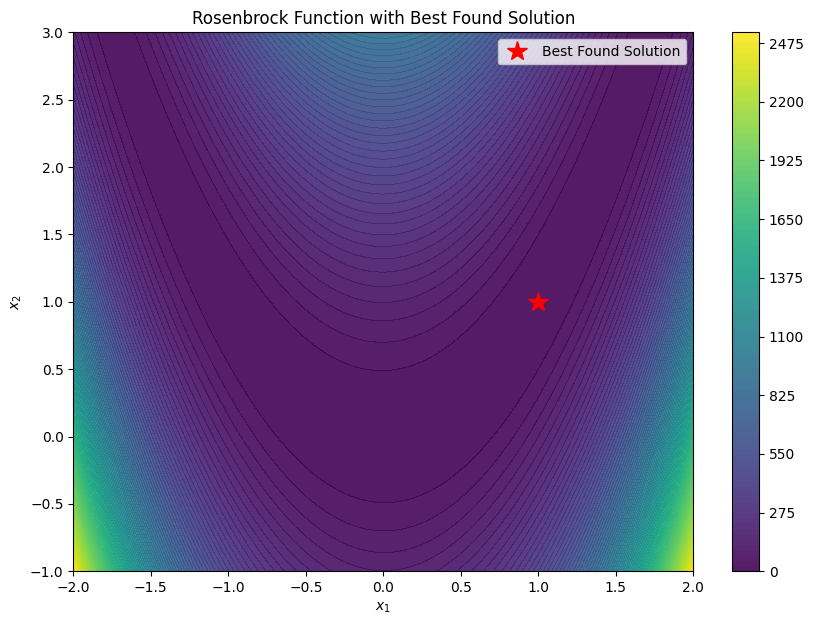

In [5]:
# Visualize the optimization result
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosen(np.array([X, Y]))
fig, ax = plt.subplots(figsize=(10, 7))
contour = ax.contourf(X, Y, Z, levels=100, cmap="viridis", alpha=0.9)
plt.colorbar(contour)
ax.plot(best_x[0], best_x[1], "r*", markersize=15, label="Best Found Solution")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Rosenbrock Function with Best Found Solution")
ax.legend()
plt.show()

This concludes our brief introduction to using the `SacessOptimizer` from `pyscat` for global optimization tasks. For more advanced usage and hyperparameter tuning, please refer to the `pyscat` documentation. For more information on `pypesto`, such as problem definition and storage of results,
 please refer to the [pyPESTO documentation](https://pypesto.readthedocs.io).